In [8]:
import matplotlib.pyplot as plt

In [2]:
def read(filename):
    myfile=open(filename)
    points_x=[]
    points_y=[]
    points=[]
    for line in myfile:
        x,y=line[:-1].split(' ')
        x=float(x)
        y=float(y)
        points_x.append(x)
        points_y.append(y)
    return points_x,points_y

def read_match(filename):
    myfile=open(filename)
    lines=[]
    for line in myfile:
        x,y=line[:-1].split(' ')
        x=int(x)
        y=int(y)
        lines.append([x,y])
    return lines

def read_paires(filename):
    myfile=open(filename)
    lines=[]
    for line in myfile:
        x1,y1,x2,y2=line[:-1].split(' ')
        x1=float(x1)
        x2=float(x2)
        y1=float(y1)
        y2=float(y2)
        lines.append([[x1,x2],[y1,y2]])
    return lines

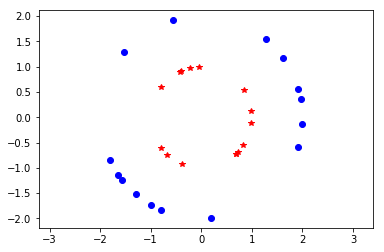

In [3]:
x1,y1=read("data/circles01.txt")
x2,y2=read("data/circles02.txt")
plt.plot(x1,y1,'bo')
plt.plot(x2,y2,'r*')
plt.axis('equal')
plt.show()

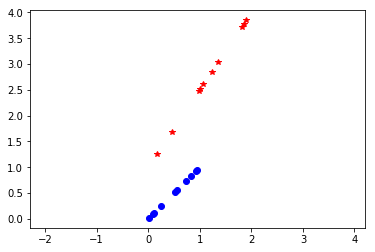

In [4]:
x1,y1=read("data/lines01.txt")
x2,y2=read("data/lines02.txt")
plt.plot(x1,y1,'bo')
plt.plot(x2,y2,'r*')
plt.axis('equal')
plt.show()

The matching cost is:  19.54529171460852


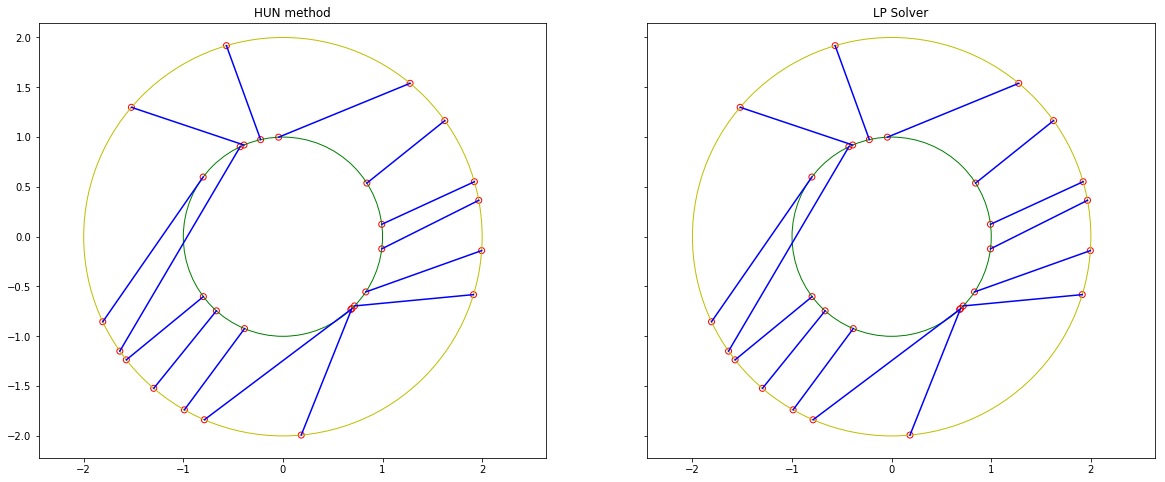

In [5]:
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
c1_x,c1_y=read("data/circles01.txt")
c2_x,c2_y=read("data/circles02.txt")
ax1.scatter(c1_x,c1_y,facecolors='none',color='r')
ax2.scatter(c1_x,c1_y,facecolors='none',color='r')
ax1.scatter(c2_x,c2_y,facecolors='none',color='r')
ax2.scatter(c2_x,c2_y,facecolors='none',color='r')


sum0=0.0;
lines=read_match("data/HUNcircles_sorted.txt")
for u,v in lines:
    a=np.array([c1_x[u],c1_y[u]])
    b=np.array([c2_x[v],c2_y[v]])
    
    sum0+= np.linalg.norm(a-b)
    x=[c1_x[u],c2_x[v]]
    y=[c1_y[u],c2_y[v]]
    ax1.plot(x,y,'b-')
    
print("The matching cost is: ",sum0);

lines2=read_match("data/GLPKcircles_sorted.txt")
for u,v in lines2:
    x=np.array([c1_x[u],c2_x[v]])
    y=np.array([c1_y[u],c2_y[v]])
    ax2.plot(x,y,'b-')


circle1 = plt.Circle((0, 0), 2.0, color='y', fill=False)
circle11 = plt.Circle((0, 0), 2.0, color='y', fill=False)
circle2 = plt.Circle((0, 0), 1.0, color='g', fill=False)
circle22 = plt.Circle((0, 0), 1.0, color='g', fill=False)
ax1.add_artist(circle11)
ax2.add_artist(circle1)
ax1.add_artist(circle22)
ax2.add_artist(circle2)
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('HUN method')
ax2.set_title('LP Solver')
#ax1.set_xlim(-2.5,2.5)
#ax2.set_xlim(-2.5,2.5)

plt.show()

In [23]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_wgan=[]
for i in range(2000):
    myfile=open("../data/mnist/wgan-gp_10000/image_"+str(i)+".txt")
    mtx=[]
    for line in myfile:
        mtx.append(line[:-2].split(' '))
    mtx=[[float(e) for e in row] for row in mtx]
    x_wgan.append(mtx)
def print_example():
    plt.figure(figsize=(5,2))
    for i in range(10) :
        ax=plt.subplot(2,5,i+1)
        plt.imshow(x_train[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
def generate_example(N,test=False):
    for i in range(N):
        datas=[]
        
        if(test):
            myfile=open("./data/mnist/test/number_"+str(i)+".txt","w")
            datas=x_test
        else:
            myfile=open("./data/mnist/train/number_"+str(i)+".txt","w")
            datas=x_train
        
        for row in datas[i]:
            for elem in row:
                myfile.write(str(elem)+" ")
            myfile.write("\n")

def print_picture_matching():
    myfile=open("../data/mnist_result2.txt")
    counter=0
    match=[]
    ind=0
    for line in myfile:
        a,b,cost=line[:-1].split(' ')
        a=int(a)
        b=int(b)
        #cost=float(cost)
        counter+=1
        match.append([a,b,cost])
        
        ind+=1
        if(ind>100):
            break;
    
    print(counter)
    plt.figure(figsize=(counter,2))
    for i in range(counter) :
        ax=plt.subplot(2,counter,i+1)
        plt.imshow(x_train[match[i][0]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(match[i][2])
        
        ax=plt.subplot(2,counter,counter+i+1)
        plt.imshow(x_test[match[i][1]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
        
    
        

In [4]:
generate_example(1000)
generate_example(1000,True)

FileNotFoundError: [Errno 2] No such file or directory: './data/mnist/train/number_0.txt'

101


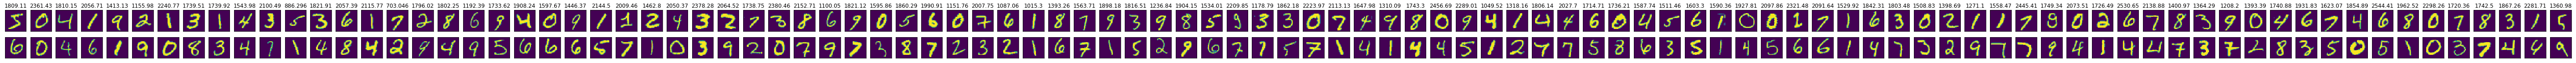

In [24]:
print_picture_matching()

8


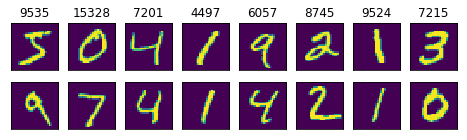

In [17]:
print_picture_matching()

8


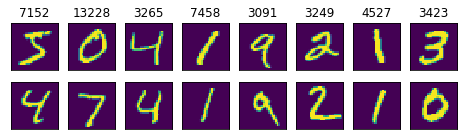

In [16]:
print_picture_matching()

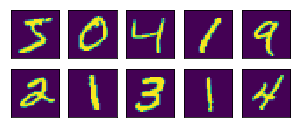

In [12]:
print_example()

In [26]:
from scipy.stats import wasserstein_distance
wasserstein_distance([2, 0, 0,0,1], [0, 0, 0,0,1])

0.4